In [1]:
def add(x:int,y:int):
    '''
    This function helps in adding 2 nums
    args:
        x (int): first int
        y (int): second int

    returns:
        int
    '''
    return x+y

In [2]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="Gemma2-9b-It")

In [3]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000023BA5936DE0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000023BA5937500>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [4]:
llm_with_tools = llm.bind_tools([add])

In [8]:
from langchain_core.messages import AIMessage,HumanMessage,AnyMessage
tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 3 plus 2",name="Phani")])

In [9]:
tool_call

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'y0pwvv925', 'function': {'arguments': '{"x":3,"y":2}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 86, 'prompt_tokens': 992, 'total_tokens': 1078, 'completion_time': 0.156363636, 'prompt_time': 0.021059925, 'queue_time': 0.254119005, 'total_time': 0.177423561}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--143bd048-f3e3-445e-af0b-8250ae3b3d7f-0', tool_calls=[{'name': 'add', 'args': {'x': 3, 'y': 2}, 'id': 'y0pwvv925', 'type': 'tool_call'}], usage_metadata={'input_tokens': 992, 'output_tokens': 86, 'total_tokens': 1078})

Creating a graph connecting the tool

In [10]:
from langgraph.graph.message import add_messages
from typing_extensions import TypedDict
from typing import Annotated

class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]
    

In [11]:
def llm_tool(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

In [14]:
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END

graph = StateGraph(State)

graph.add_node("llm_tool",llm_tool)

graph.add_edge(START,"llm_tool")
graph.add_edge("llm_tool",END)

graph_build = graph.compile()

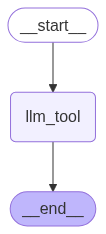

In [15]:
display(Image(graph_build.get_graph().draw_mermaid_png()))

In [16]:

messages=graph_build.invoke({"messages":"What is 2 plus 2"})

for message in messages["messages"]:
    message.pretty_print()

================================ Human Message =================================

What is 2 plus 2
================================== Ai Message ==================================
Tool Calls:
  add (z3yzcdfkr)
 Call ID: z3yzcdfkr
  Args:
    x: 2
    y: 2


In [ ]:
from langgraph.prebuilt import ToolNode,tools_condition

In [ ]:
graph = StateGraph(State)

graph.add_node("llm")